# Week 1 Summary 

## Initalisation


In [1]:
# initalisation

import json
from IPython.display import Image, display


with open('occupations_500.json', 'r') as f:
    occ_500 = json.load(f)

with open('occupations_750.json', 'r') as f:
    occ_750 = json.load(f)

## Summary


This week I have used iDEA to simulate a particle in a box system. This was to:
* Become familar with iDEA
* Test that iDEA gives correct outputs for energy of the system
* Determine where the multiplets lie

From this, I have found a potential bug in how iDEA places electrons in orbitals and how it deals with infinite boundaries
. I have also discovered that many body systems are quite computationally expensive.




## Theory


For a particle in a box, the energy eigenvalues of a single particle state are given by $\epsilon_{k} = \frac{\pi^{2}}{2L^{2}} (k+1)^2$ in atomic units, $L = 5$ and for $k = 0, 1, \dots$  with $k = 0$ being the ground state of the system.

This gives a simple $\frac{(k+1)^2}{2L^{2}}$ relation if we write energy in terms of $\pi^2$.

Thus $\epsilon_{0} = 0.02, \epsilon_{1} = 0.08, \epsilon_{2} = 0.18$ etc 

This energy eigenvalue solves equation $H_{s}\psi_{k} = \epsilon_{k}\psi_{k}$. 

However when calling `iDEA.methods.interacting.solve`, the energy given out is the eigenvalue of $H_{MB} \phi = E_{k} \phi$, but for a system like a particle in a box, we know that analytically the ground state should be $E_{0} = 2\epsilon_{0}= 0.04$ and can draw out other states.




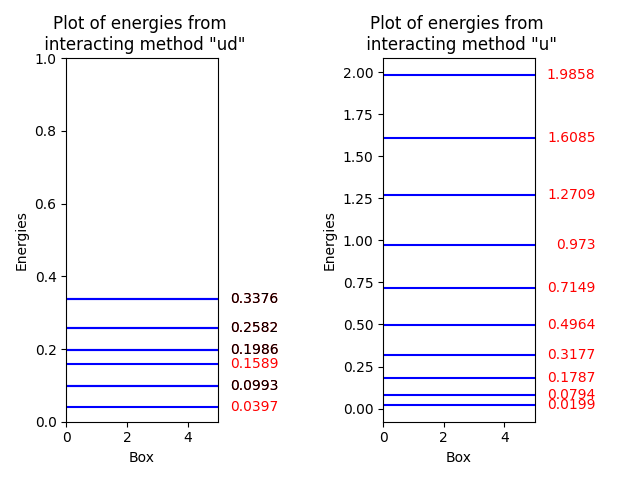

State = 0: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0199, 0.0199]', 'Total energy = 0.0398']
---
State = 1: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0199, 0.0794]', 'Total energy = 0.0993']
---
State = 2: ['Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0794, 0.0199]', 'Total energy = 0.0993']
---
State = 3: ['Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0794, 0.0794]', 'Total energy = 0.1588']
---
State = 4: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.0199, 0.1787]', 'Total energy = 0.1986']
---
State = 5: ['Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.1787, 0.0199]', 'Total energy = 0.1986']
---
State = 6: ['Orbitals occupied by up: [1]', 'Orbitals occupied b

In [2]:
display(Image(filename="pib_500_energy_levels.png"))
for key, value in occ_500.items():
    print(f'{key}: {value}')
    print('---') 

The plots above show the energy levels of the system for the two body "ud" system and the single body "u" system from iDEA with 500 grid points. This run took ~26 hours to complete. The levels labelled in black are multiplet states which occur at State 1 and 2, 4 and 5, 6 and 7, 8 and 9. THESE STATES ARE PREDICTED THROUGH

From the data shown, we can see that for states 6 and 7, 8 and 9, they have the exact same electronic configuration where they should flip. This is the potential bug found and further work is needed to find out why this happens. 


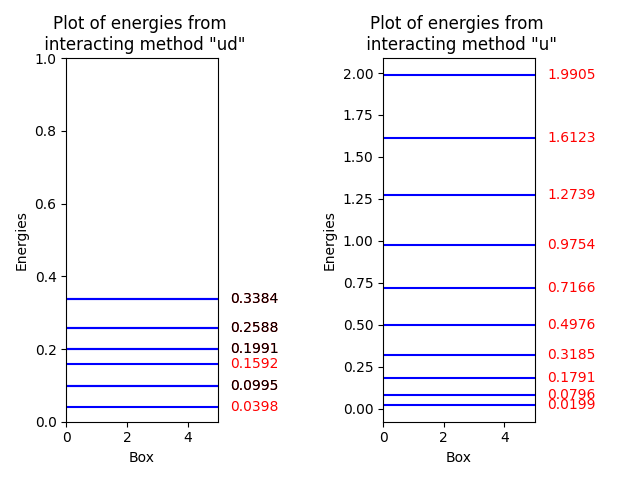

State = 0: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0199, 0.0199]', 'Total energy = 0.0398']
---
State = 1: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0199, 0.0796]', 'Total energy = 0.0995']
---
State = 2: ['Orbitals occupied by up: [1]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.0796, 0.0199]', 'Total energy = 0.0995']
---
State = 3: ['Orbitals occupied by up: [1]', 'Orbitals occupied by down: [1]', 'Energy of occupied orbitals: [0.0796, 0.0796]', 'Total energy = 0.1592']
---
State = 4: ['Orbitals occupied by up: [0]', 'Orbitals occupied by down: [2]', 'Energy of occupied orbitals: [0.0199, 0.1791]', 'Total energy = 0.199']
---
State = 5: ['Orbitals occupied by up: [2]', 'Orbitals occupied by down: [0]', 'Energy of occupied orbitals: [0.1791, 0.0199]', 'Total energy = 0.199']
---
State = 6: ['Orbitals occupied by up: [1]', 'Orbitals occupied by 

In [3]:
display(Image(filename="pib_750_energy_levels.png"))
for key, value in occ_750.items():
    print(f'{key}: {value}')
    print('---') 
    

A similar plot and data but for 750 grid points. This run took ~42 hours to complete.

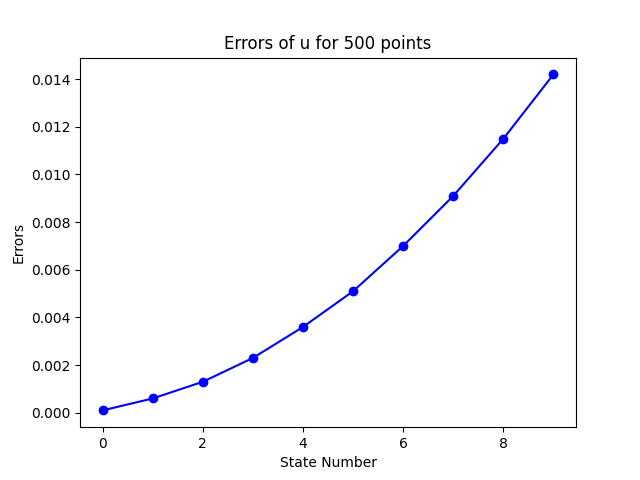

In [4]:
display(Image(filename="pib_500_errors.png"))

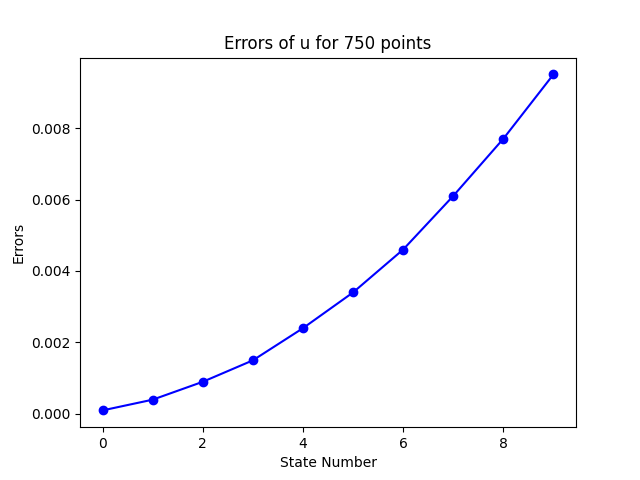

In [5]:
display(Image(filename="pib_750_errors.png"))

As expected, the errors for the energy of the single body system are reduced a significant amount by increasing the number of grid points from 500 to 750.

However after discussion with how iDEA actually utilises these grid points for a simple system such as a particle in a box, it was suggested that for our analytic eigenvalues $\frac{(k+1)^2}{2L^{2}}$ we alter $L$ slightly to include the next steps before and after $0$ and $L$ i.e our new eigenvalues will be $\frac{(k+1)^2}{2(L+ 2\delta x)^{2}}$.

This seemed to be the right methodology as this significantly reduced the errors as seen in the plots below.

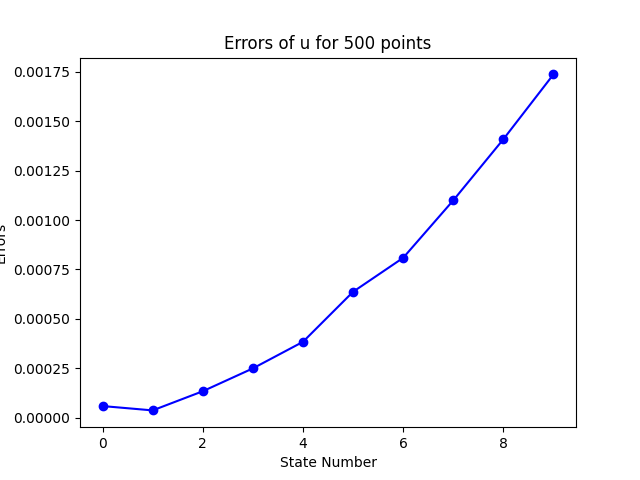

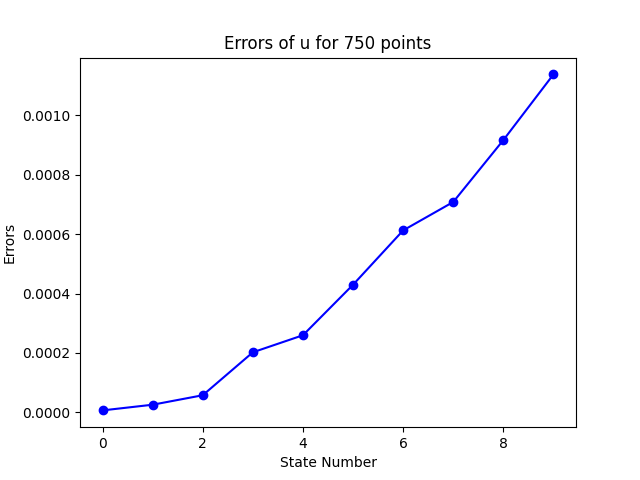

In [6]:
display(Image(filename="pib_500_errors_2.png"))
display(Image(filename="pib_750_errors_2.png"))

The max error for 500 points went from 0.0142 to 0.001736 and for 750 points from 0.0095 to 0.0011. These both are an ~88% decrease in error. It is evident that iDEA may need a way to deal with boundaries such that this issue does not persist. 